In [ ]:
# This script is used to generate a cell type ranking heatmap based on the divergence and noise values of each NC key gene across different cell types.

In [ ]:
import pandas as pd
keyfdr=pd.read_csv('/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/Human/key-genes-fdr')
gene_list=keyfdr['gene'].tolist()

<Figure size 288x432 with 0 Axes>

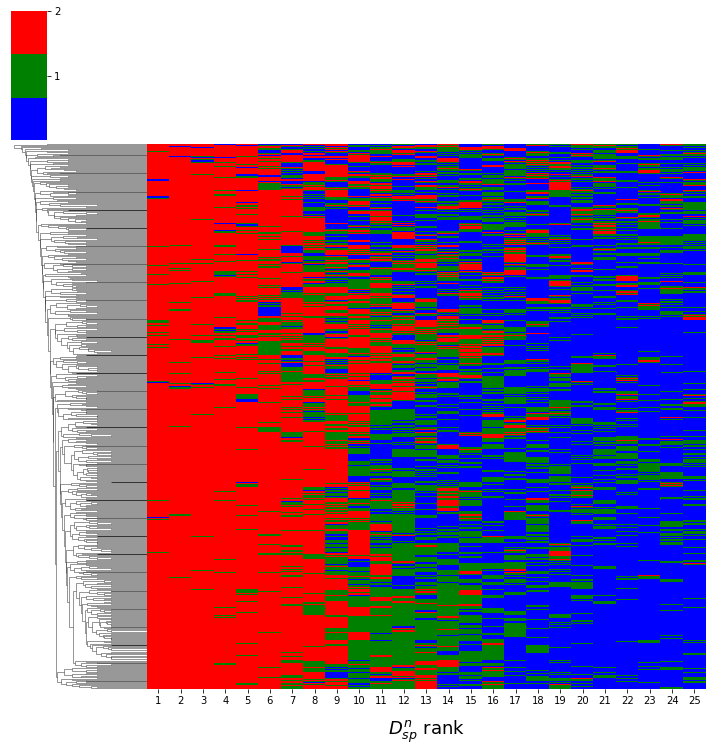

In [ ]:


gene_z_dict = {}

for gene in gene_list:
    z_values = []
    for cp in cp_list:
        if exp[gene][cp] ==0:
            z_values.append(0)
        else:
            z_values.append(df0[gene][f'{cp}--0']/exp[gene][cp])
    cp_list_sorted = [x for _, x in sorted(zip(z_values, cp_list), key=lambda pair: pair[0])]
    cp_list_value=[]
    for i in cp_list_sorted:
        if i in ExN:
            cp_list_value.append(0)
        elif i in InN:
            cp_list_value.append(1)
        elif i in non_neuron:
            cp_list_value.append(2)
        else:
            print (i)
    
    gene_z_dict[gene] = cp_list_value
dfz = pd.DataFrame.from_dict(gene_z_dict, orient='index', columns=range(1,26))
import seaborn as sns
from matplotlib.colors import ListedColormap
pyplot.figure(figsize=(4, 6))

cmap = ListedColormap(sns.color_palette(["blue", "green","red"]))

g = sns.clustermap(dfz, xticklabels=True,yticklabels=False, cmap=cmap, row_cluster=True, col_cluster=False)


colorbar = g.ax_heatmap.collections[0].colorbar
colorbar.set_ticks([1.0, 2.0])
#colorbar.set_ticklabels(["blue", "green","red"])
g.ax_heatmap.set_xlabel(r'$D^n_{sp}$ rank', fontsize=18, fontname='Arial',labelpad=13)
#g.ax_heatmap.set_ylabel('Gene', fontsize=18,fontname='Arial',labelpad=29,rotation=360)
g.savefig(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/fig/fig4c_2.png', dpi=300, bbox_inches='tight')

pyplot.show(g)


/home/qintian/anaconda3/envs/r4.1/lib/python3.6/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 288x432 with 0 Axes>

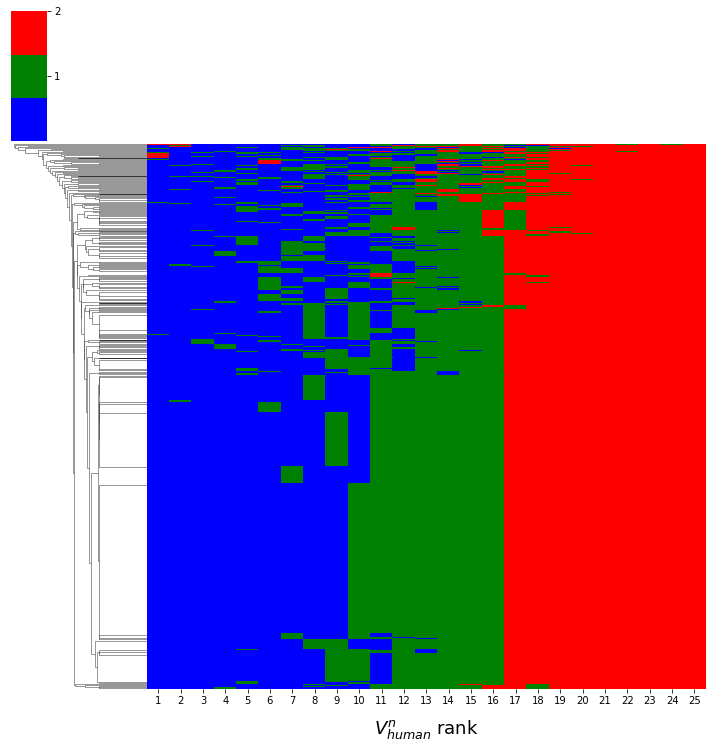

In [ ]:
import pandas as pd
gene_z_dict = {}

for gene in gene_list:
    z_values = []
    for cp in cp_list:
        if exp[gene][cp] ==0:
            z_values.append(100000000)
        else:
            z_values.append(df1[gene][f'{cp}--4']/exp[gene][cp])
    cp_list_sorted = [x for _, x in sorted(zip(z_values, cp_list), key=lambda pair: pair[0])]
    cp_list_value=[]
    for i in cp_list_sorted:
        if i in ExN:
            cp_list_value.append(0)
        if i in InN:
            cp_list_value.append(1)
        if i in non_neuron:
            cp_list_value.append(2)
    
    gene_z_dict[gene] = cp_list_value
dfz = pd.DataFrame.from_dict(gene_z_dict, orient='index', columns=range(1,26))
import seaborn as sns
from matplotlib.colors import ListedColormap
pyplot.figure(figsize=(4, 6))


cmap = ListedColormap(sns.color_palette(["blue", "green","red"]))

g = sns.clustermap(dfz, yticklabels=False, cmap=cmap, row_cluster=True, col_cluster=False)

colorbar = g.ax_heatmap.collections[0].colorbar
colorbar.set_ticks([1.0, 2.0])
#colorbar.set_ticks([0.0, 1.0])
#colorbar.set_ticklabels(["blue", "green","red"])
g.ax_heatmap.set_xlabel(r'$V^n_{human}$ rank', fontsize=18, fontname='Arial',labelpad=13)
#g.ax_heatmap.set_ylabel('Gene', fontsize=18,fontname='Arial',labelpad=29,rotation=360)
g.savefig(f'/data1/qintian/science_repeat/ProcessedData/result0/anova/sum_frame_rh/fig/fig4c.png', dpi=300, bbox_inches='tight')

pyplot.show(g)